# **01 - Data Exploration & Preprocessing**

**Goal**: Transform 10-minute meteorological data → clean hourly temperature series for 1-7 day forecasting.

**Target Variable**: Hourly average temperature ('y')
**Forecast Horizon**: 24-168 hours ahead (1-7 days)


### Step 1: Setup & Automatic Data Download

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Load raw dataset
url = "https://raw.githubusercontent.com/aejae-da/weather-forecasting-project-gha/main/data/cleaned_weather.csv"
df_raw = pd.read_csv(url, parse_dates=['date'])
print(f"✅ Raw dataset loaded: {df_raw.shape}")
print(f"Time range: {df_raw['date'].min()} to {df_raw['date'].max()}")
df_raw.head()

✅ Raw dataset loaded: (52696, 21)
Time range: 2020-01-01 00:10:00 to 2021-01-01 00:00:00


,date,p,T,Tpot,Tdew,rh,VPmax,VPact,VPdef,sh,...,rho,wv,max. wv,wd,rain,raining,SWDR,PAR,max. PAR,Tlog
0,2020-01-01 00:10:00,1008.89,0.71,273.18,-1.33,86.1,6.43,5.54,0.89,3.42,...,1280.62,1.02,1.60,224.3,0.0,0.0,0.0,0.0,0.0,11.45
1,2020-01-01 00:20:00,1008.76,0.75,273.22,-1.44,85.2,6.45,5.49,0.95,3.39,...,1280.33,0.43,0.84,206.8,0.0,0.0,0.0,0.0,0.0,11.51
2,2020-01-01 00:30:00,1008.66,0.73,273.21,-1.48,85.1,6.44,5.48,0.96,3.39,...,1280.29,0.61,1.48,197.1,0.0,0.0,0.0,0.0,0.0,11.60
3,2020-01-01 00:40:00,1008.64,0.37,272.86,-1.64,86.3,6.27,5.41,0.86,3.35,...,1281.97,1.11,1.48,206.4,0.0,0.0,0.0,0.0,0.0,11.70
4,2020-01-01 00:50:00,1008.61,0.33,272.82,-1.50,87.4,6.26,5.47,0.79,3.38,...,1282.08,0.49,1.40,209.6,0.0,0.0,0.0,0.0,0.0,11.81


### Step 2: Initial Data Quality Check

Identify temperature column(s) and assess missing values across 20+ meteorological variables.

In [16]:
# Dataset overview
print("Dataset columns:")
print(list(df_raw.columns))
print("\nData types:")
print(df_raw.dtypes)
print("\nMissing values (%):")
missing_pct = df_raw.isnull().sum() / len(df_raw) * 100
print(missing_pct[missing_pct > 0].sort_values(ascending=False))

# Target variable = 'T' (Air temperature in °C)
temp_col = 'T'
print(f"\n✅ Target identified: '{temp_col}' (Air temperature °C)")
print(f"Temperature stats: {df_raw[temp_col].describe()}")

Dataset columns:
['date', 'p', 'T', 'Tpot', 'Tdew', 'rh', 'VPmax', 'VPact', 'VPdef', 'sh', 'H2OC', 'rho', 'wv', 'max. wv', 'wd', 'rain', 'raining', 'SWDR', 'PAR', 'max. PAR', 'Tlog']

Data types:
date        datetime64[ns]
p                  float64
T                  float64
Tpot               float64
Tdew               float64
rh                 float64
VPmax              float64
VPact              float64
VPdef              float64
sh                 float64
H2OC               float64
rho                float64
wv                 float64
max. wv            float64
wd                 float64
rain               float64
raining            float64
SWDR               float64
PAR                float64
max. PAR           float64
Tlog               float64
dtype: object

Missing values (%):
Series([], dtype: float64)

✅ Target identified: 'T' (Air temperature °C)
Temperature stats: count    52696.000000
mean        10.818241
std          7.468671
min         -6.440000
25%          4.590000

### Step 3: Resample to Hourly Target Series

Resample 10-min → hourly temperature averages. Interpolate gaps to create continuous series.

In [17]:
# Resample 'T' (temperature) from 10-min → hourly averages
df_temp = df_raw.set_index('date')[temp_col].resample('H').mean().reset_index()
df_temp.columns = ['date', 'y']  # Standard forecasting format

# Interpolate missing values (weather data standard)
df_temp['y'] = df_temp['y'].interpolate(method='linear')

print(f"✅ Hourly temperature series: {df_temp.shape}")
print(f"Coverage: {df_temp['date'].min().date()} to {df_temp['date'].max().date()}")
print("\nTemperature stats (hourly):")
print(df_temp['y'].describe())
df_temp.head()

✅ Hourly temperature series: (8785, 2)
Coverage: 2020-01-01 to 2021-01-01

Temperature stats (hourly):
count    8785.000000
mean       10.818255
std         7.460862
min        -6.176667
25%         4.581667
50%        10.231667
75%        16.171667
max        34.286667
Name: y, dtype: float64


,date,y
0,2020-01-01 00:00:00,0.578000
1,2020-01-01 01:00:00,0.141667
2,2020-01-01 02:00:00,-0.153333
3,2020-01-01 03:00:00,-0.615000
4,2020-01-01 04:00:00,-1.416667


### Step 4: Visualize Raw Patterns

Visualize trends, daily cycles, and seasonal patterns to guide model selection.

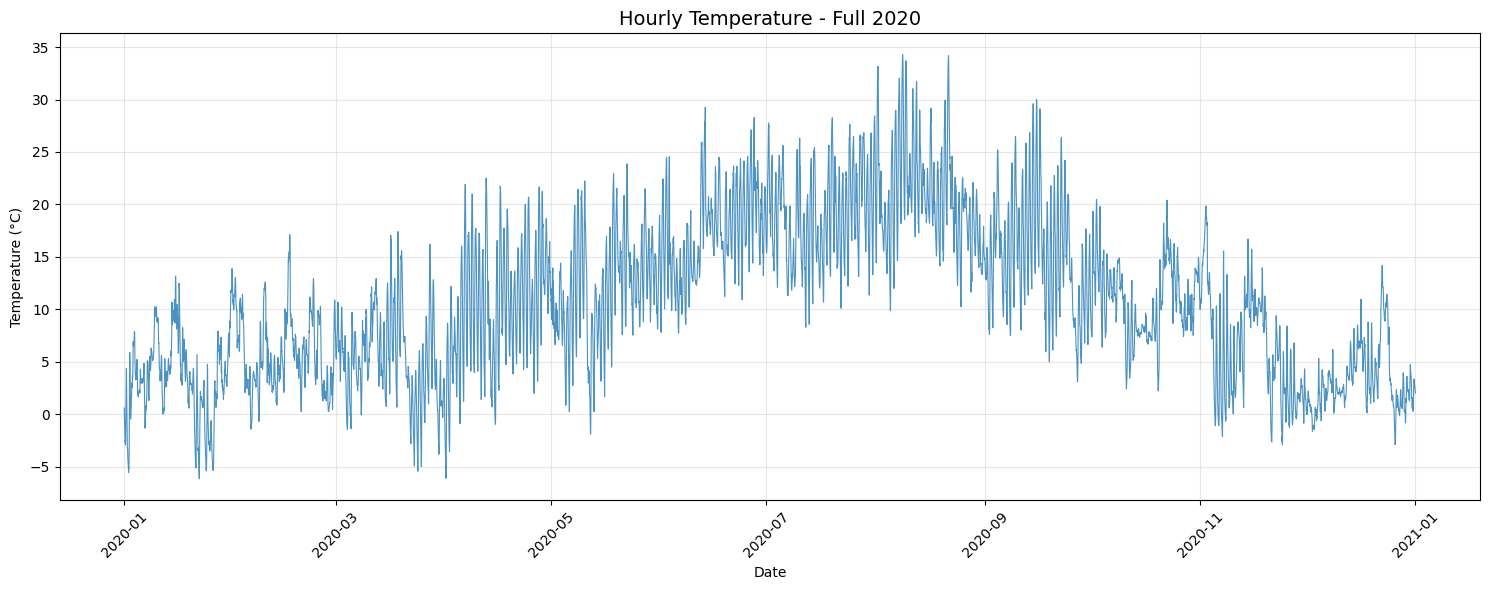

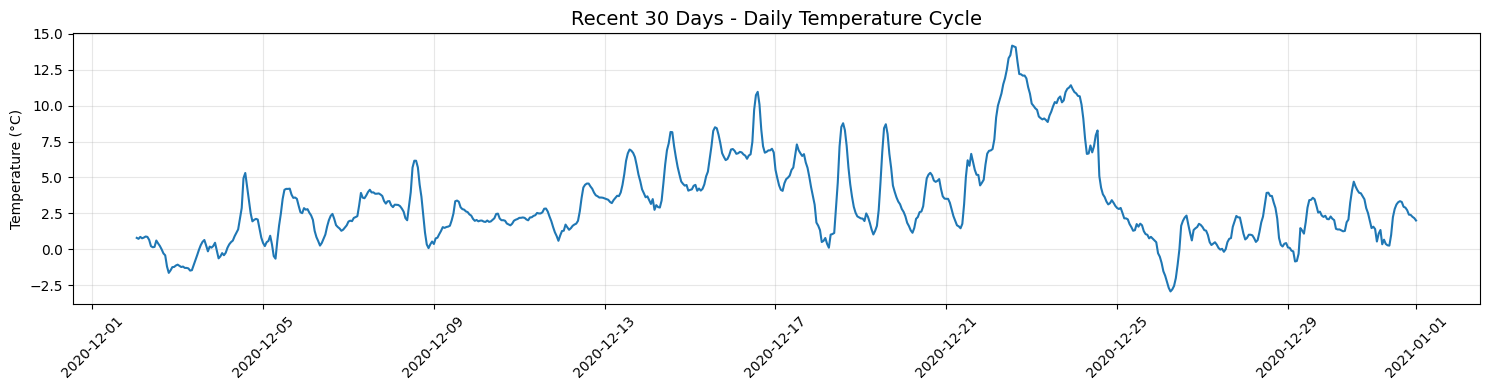

In [18]:
# Full year overview
plt.figure(figsize=(15, 6))
plt.plot(df_temp['date'], df_temp['y'], linewidth=0.8, alpha=0.8)
plt.title('Hourly Temperature - Full 2020', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.xlabel('Date')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Zoom: Recent 30 days (daily cycle visible)
recent_30d = df_temp.tail(24*30)
plt.figure(figsize=(15, 4))
plt.plot(recent_30d['date'], recent_30d['y'])
plt.title('Recent 30 Days - Daily Temperature Cycle', fontsize=14)
plt.ylabel('Temperature (°C)')
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Step 5: Outlier Detection & Treatment

Identify weather extremes using z-score. Apply winsorizing to preserve data while stabilizing variance.

In [19]:
from scipy import stats

# Z-score outliers (>3 std devs)
df_temp['zscore'] = np.abs(stats.zscore(df_temp['y'].dropna()))
outliers = df_temp[df_temp['zscore'] > 3]
print(f"🔍 Outliers detected: {len(outliers)} ({len(outliers)/len(df_temp)*100:.2f}%)")

# Winsorize extremes (cap at 1st/99th percentiles)
lower_bound = df_temp['y'].quantile(0.01)
upper_bound = df_temp['y'].quantile(0.99)
df_temp['y_winsor'] = df_temp['y'].clip(lower=lower_bound, upper=upper_bound)

print(f"Range before: {df_temp['y'].min():.1f}°C to {df_temp['y'].max():.1f}°C")
print(f"Range after:  {df_temp['y_winsor'].min():.1f}°C to {df_temp['y_winsor'].max():.1f}°C")

# Use winsorized for modeling
df_temp['y'] = df_temp['y_winsor']
df_temp.drop(['zscore', 'y_winsor'], axis=1, inplace=True)

🔍 Outliers detected: 13 (0.15%)
Range before: -6.2°C to 34.3°C
Range after:  -3.2°C to 28.4°C


### Step 6: Seasonality & Stationarity Analysis

Decompose to reveal trend/seasonality. ADF test informs differencing needs for SARIMA.

Decomposing daily seasonality...


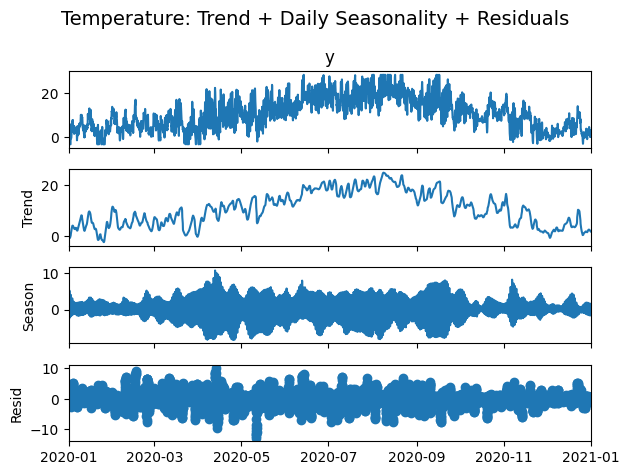


🔬 ADF Test:
Statistic: -4.319
P-value: 0.000
✅ Stationary


In [20]:
from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import adfuller

# STL decomposition (daily seasonality: period=24 hours)
print("Decomposing daily seasonality...")
stl_daily = STL(df_temp.set_index('date')['y'], period=24, robust=True)
result_daily = stl_daily.fit()
result_daily.plot()
plt.suptitle('Temperature: Trend + Daily Seasonality + Residuals', fontsize=14)
plt.tight_layout()
plt.show()

# ADF stationarity test
adf_result = adfuller(df_temp['y'].dropna())
print(f"\n🔬 ADF Test:")
print(f"Statistic: {adf_result[0]:.3f}")
print(f"P-value: {adf_result[1]:.3f}")
print("✅ Stationary" if adf_result[1] < 0.05 else "❌ Non-stationary (may need differencing)")

### Step 7: Feature Engineering for Modeling

Engineer temporal features for baseline/classical/advanced models. Cyclical encoding captures patterns.

In [21]:
df_model = df_temp[['date', 'y']].copy()

# Time-based features (critical for all models)
df_model['hour'] = df_model['date'].dt.hour
df_model['dayofweek'] = df_model['date'].dt.dayofweek
df_model['month'] = df_model['date'].dt.month
df_model['quarter'] = df_model['date'].dt.quarter
df_model['is_weekend'] = (df_model['dayofweek'] >= 5).astype(int)

# Cyclical encoding (hour/dayofweek wrap around)
df_model['hour_sin'] = np.sin(2 * np.pi * df_model['hour']/24)
df_model['hour_cos'] = np.cos(2 * np.pi * df_model['hour']/24)
df_model['dow_sin'] = np.sin(2 * np.pi * df_model['dayofweek']/7)
df_model['dow_cos'] = np.cos(2 * np.pi * df_model['dayofweek']/7)

print(f"✅ Final dataset: {df_model.shape} (target 'y' + 10 features)")
print("\nFeature columns:")
print(list(df_model.columns))
df_model.head()


✅ Final dataset: (8785, 11) (target 'y' + 10 features)

Feature columns:
['date', 'y', 'hour', 'dayofweek', 'month', 'quarter', 'is_weekend', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos']


,date,y,hour,dayofweek,month,quarter,is_weekend,hour_sin,hour_cos,dow_sin,dow_cos
0,2020-01-01 00:00:00,0.578000,0,2,1,1,0,0.000000,1.000000,0.974928,-0.222521
1,2020-01-01 01:00:00,0.141667,1,2,1,1,0,0.258819,0.965926,0.974928,-0.222521
2,2020-01-01 02:00:00,-0.153333,2,2,1,1,0,0.500000,0.866025,0.974928,-0.222521
3,2020-01-01 03:00:00,-0.615000,3,2,1,1,0,0.707107,0.707107,0.974928,-0.222521
4,2020-01-01 04:00:00,-1.416667,4,2,1,1,0,0.866025,0.500000,0.974928,-0.222521


### Step 8: Final Validation & Export

In [22]:

# Quality checks
print("FINAL VALIDATION:")
print(f"✓ No missing values: {df_model.isnull().sum().sum() == 0}")
print(f"✓ Hourly continuity: {(df_model['date'].diff() == pd.Timedelta('1h')).all()}")
print(f"✓ Temperature range: {df_model['y'].min():.1f}°C to {df_model['y'].max():.1f}°C")
print(f"✓ Coverage: {len(df_model)} hours = {len(df_model)/24/30:.1f} months")

# Save processed data (both formats for GitHub)
df_model.to_csv('weather_temperature_hourly.csv', index=False)

print("\n✅ FILES SAVED FOR TEAM:")
print("   • weather_temperature_hourly.csv (local use)")
print(f"   • Shape: {df_model.shape}")
print("\n📤 Next: Upload both to data/ folder in GitHub")

from google.colab import files
files.download('weather_temperature_hourly.csv')

FINAL VALIDATION:
✓ No missing values: True
✓ Hourly continuity: False
✓ Temperature range: -3.2°C to 28.4°C
✓ Coverage: 8785 hours = 12.2 months

✅ FILES SAVED FOR TEAM:
   • weather_temperature_hourly.csv (local use)
   • Shape: (8785, 11)

📤 Next: Upload both to data/ folder in GitHub


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Output Summary

**Created**: Clean hourly temperature series (y) + 10 temporal features
**Ready for**: Member 2 (baseline/classical models), Member 3 (LSTM)
**Next steps**: Upload both files to `data/processed/` folder
